# Python Language Review

This document is a series of short Python code examples. It was written
for COMP 432. You need to understand these language features to be a
half-competent Python programmer. If you do not understand these things,
you will struggle to write machine learning code.

-   If you're relatively new to the language, you should use a [tutorial
    like this](https://docs.python.org/3/tutorial/) to broaden your
    knowledge.
-   For the sake of your career, you are strongly advised to learn the
    coding style described in
    [PEP8](https://www.python.org/dev/peps/pep-0008/) and documentation
    style in [PEP257](https://www.python.org/dev/peps/pep-0257/).

## Variables

A Python variable is a symbol that refers to an object. *Never* confuse
the symbol (the variable name) with the object that it refers to. *They
are two different things.*


In [ ]:
a = 5 # Number
b = 'hello' # String
c = ['hello', 'world!'] # List
d = (1,2) # Tuple
e = {'Mark': 'B+', 'Annie': 'A+'} # Dictionary

# Print variables with their types
print(a)
print(type(a))
print(b)
print(type(b))
print(c)
print(type(c))
print(d)
print(type(d))
print(e)
print(type(e))

5
<class 'int'>
hello
<class 'str'>
['hello', 'world!']
<class 'list'>
(1, 2)
<class 'tuple'>
{'Mark': 'B+', 'Annie': 'A+'}
<class 'dict'>


Let's now take a closer look at the variable types.

## Numbers

Know the difference between float division (the default) and integer
division:



In [ ]:
print(3 / 2)  # In Python 3, dividing two integers results in a floating-point value
print(3 // 2 ) # In Python 3, you must use the // operator to force integer division

1.5
1


You should know about the `**` exponentiation operator:

In [ ]:
print(2**3)            # 2 cubed
print(2**0.5)          # square root of 2

8
1.4142135623730951


You should know how to express floating-point numbers (float) in
scientific notation:

In [ ]:
print(1e-3)            # Same as 10**(-3), but prefer scientific notation
print(1e3)             # A number expressed in scientific notation is always of type float

0.001
1000.0


Python floats are 64-bit, like a `double` in C. You should know about
the limitations of floats:



In [ ]:
print(1e-323 == 0.0)   # Very very tiny value
print(1e-324 == 0.0)   # So tiny we can't represent it with 64-bit float anymore, rounds down to 0.0

print(1 / 2**0.5)      # Mathematically, 1/sqrt(2) == sqrt(2)/2, but ...
print( 2**0.5 / 2)     # *numerically* they are slightly different

False
True
0.7071067811865475
0.7071067811865476


If you don't understand the above, read more about [IEEE floating-point
numbers](https://www.mimosa.org/ieee-floating-point-format/).

## Strings

You should know the different ways to create strings:


In [ ]:
s = 'hello'      # Make a new variable 's' and make it refer to a string object with value 'hello'
s = "hello"      # Same thing, with double-quotes
s = """hello"""  # Same thing, with triple-quotes
print(s)

hello


The triple-quote is special because it lets you define multi-line
strings:

In [ ]:
print('first\nsecond')  # Single quotes require escape character \n (newline)
print("""first
... second""")          # Triple-quotes let you write multiple lines of text right into the string

first
second
first
... second


You can treat strings like a sequence of characters:



In [ ]:
s = 'abcd'
print(s[2])         # Get the character at index 2 (the third character)
print(len(s))       # Get the length of the string (the number of characters)

c
4


You can append strings together:



In [ ]:
s = 'before ' + s + ' after'  # Make 's' refer to a new string object built from the old value
print(s)

before abcd after


You can get a string representation of most Python objects:


In [ ]:
x = 123
print(str(x))

123


You can also split and join strings together:

In [ ]:
words = 'Dog versus cat'.split()     # Split a string by whitespace
print(words)                         # The result is a list of string objects
print('-'.join(words))               # Make a string object with value '-' and then call its join()

['Dog', 'versus', 'cat']
Dog-versus-cat


Knowing what [string
functions](https://docs.python.org/3/library/stdtypes.html#str) Python
provides will help you write better code.

## String formatting

See this [Python string formatting guide](https://pyformat.info/) for
lots of examples, comparing both "old style" and "new style."

The "old style" string formatting in Python is similar to the `printf`
function in C:



In [ ]:
name = 'Jack'
age = 7
print('%s is %d years old' % (name, age))

Jack is 7 years old


The formatting scheme is similar to the `printf` function in C, where
`%s` means string, `%.2f` means "floating point value with 2 decimals of
precision," etc.

## Lists

A [list](https://docs.python.org/3/library/stdtypes.html#list) is a
mutable sequence.

You should know how to make lists:



In [ ]:
x = []                   # Make 'x' refer to a new empty list object
x = list()               # Same as above
x = [3, 'abc']           # Make 'x' refer to a new list object that has two slots, one referring
                             # to an integer object and one referring to a string object
print(x)

[3, 'abc']


You can get and set items by index:



In [ ]:
print(x[0])         # Get the reference in the 1st slot
x[0] = 7
print(x[0])     # Set the reference in the 1st slot to a new integer object
print(x)

3
7
[7, 'abc']


You should think of lists as containing 'slots', where each slot is a
reference to an object. Make sure you understand the following example:



In [ ]:
x = 257            # Make a variable 'x' that refers to an integer object
y = [x, x, 257]    # Make a list object where each of the slots refers to an integer object,
                   # and make a variable 'y' refer to that list
print(y)           # By all appearances, a list of three identical integers
print(y[0] is y[1])       # The first two slots refer to the same integer object
print(y[0] is y[2])       # The last slot refers to a different integer object, though it has the same value

[257, 257, 257]
True
False


If you know C programming, think of each slot as a pointer to an object.
If you run the above code, the Python interpreter allocates the
following chunks of memory:

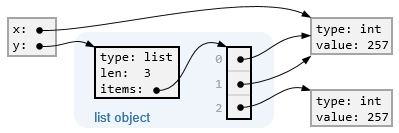<span class="image"></span>

Arrows represent a reference. The list object comprises a fixed-size
chunk and a variable-sized chunk of slots (the items). In this example
there are two distinct integer objects, even though they both hold value
257.

You can add or remove items from a list:


In [ ]:
x = ['a', 'b', 'c']    # Create a list object with 3 slots
x.append('d')          # Create a 4th slot and make it refer to a new string
print(x)

del x[1]               # Delete the 2nd slot, removing the reference and shifting the later slots
print(x)

x.pop()                # Remove the last slot in the list, and return whatever object it refered to
print(x)

['a', 'b', 'c', 'd']
['a', 'c', 'd']
['a', 'c']


You can concatenate lists with `+` or `+=`:



In [ ]:
x = ['a', 'b']
y = ['c']
z = x + y           # Create a new list with 3 slots that refer to the same objects as in 'x' and 'y'
print(z)

['a', 'b', 'c']


You can repeat a list with `*` or `*=`:



In [ ]:
print(x * 3)

['a', 'b', 'a', 'b', 'a', 'b']


You can build a list from any sequence-like object, such as a string:

In [ ]:
x  = list('hello')          # Create a list of five string objects, one for each character
print(x)

['h', 'e', 'l', 'l', 'o']


Since a list slot can refer to any kind of object, you can also make
list-of-lists:



In [ ]:
x = [[1, 2, 3], ['foo', 'bar']]   # Make three lists: two inner lists, and one outer list
print(x[0])                              # Get list object referred to by the first slot
print(x[1][0])                           # Get string object referred to by 2nd list's 1st slot

[1, 2, 3]
foo


## Immutable types

An object is *immutable* if its value cannot be changed after
initialization. It is read-only after creation.

That sounds like a bad thing. *Why restrict objects from changing their
value?* Two reasons:

1.  Immutable objects requires less memory than a mutable type.
2.  Immutable objects can be safely used as dictonary keys: they can't
    be invalidated by a change in value.

For example, **strings are immutable.** You can't modify a string, you
can only use it to build new strings:


In [ ]:
s = 'cat'
s[0] = 'h' #TypeError: 'str' object does not support item assignment

TypeError: 'str' object does not support item assignment

If we need a modification of a string, we need to use the replace method

In [ ]:
x = s.replace('c', 'h')  # Returns a new string object built from the old one
print(x)
print(s)

hat
cat


We often use strings as keys in a *dictionary* or a *set* (covered
later), so immutability is important for strings.

## Tuples

A [tuple](https://docs.python.org/3/library/stdtypes.html#tuple) works
the same as a list, except that **tuples are immutable.** You can't
add/remove/replace items.

Tuples are being created and destroyed *all the time* in Python. Each
time you call a function, a tuple is created to hold its arguments. Each
time you return multiple values from a function, a tuple is created to
hold them.

You should know how to make tuples:


In [ ]:
x = ()           # Make 'x' refer to an empty tuple
x = tuple()      # Same as above
x = (1, 2, 3)    # Make 'x' refer to a new tuple that has 3 slots, each referring to an integer object
x = 1, 2, 3      # Same as above
print(x)

(1, 2, 3)


You got an error if you try to modify a tuple

In [ ]:
x[0]=10

TypeError: 'tuple' object does not support item assignment

When you assign multiple variables at once, you're using tuples:


In [ ]:
x, y = 3, 5   # Create a tuple (3, 5) and unpack the values into tuple (x, y)
print(x)
print(y)

3
5


The idiomatic way to swap two variables in Python uses tuples:




In [ ]:
x, y = y, x    # Create a tuple (y, x) and unpack the values into tuple (x, y)
print(x, y)

5 3


Tuples have a length:



In [ ]:
x = (0, 1, 2)
print(len(x))

3


Tuples are slightly more memory efficient than lists (one chunk, not
two), but this seldom matters.

## Indexing and slicing

Strings, lists, tuples, and most sequence-like objects support indexing
and slicing exactly the same way.

You should know how slicing works:



In [ ]:
x = 'abcd'
print(x[1:3])        # New string object copied from index 1 and stopping at index 3
print(x[2:])         # Same as x[2:len(x)]
print(x[:2])         # Same as x[0:2]

i, n = 1, 3
print(x[i:i+n])      # Same as x[1:4]

bc
cd
ab
bcd


Beware that Python will not raise an error if you ask for a slice
outside the range of items:




In [ ]:
print(x[1:100])      # OK, but don't expect 99 items
print(x[50:100])     # OK, but don't expect 49 items (the output will be empty)

bcd



You should also know how negative indexing works. A negative index `-i`
always refers to slot `len - i`:



In [ ]:
print(x[-1])     # Same as x[len(x)-1]
print(x[-2:])    # Same as x[len(x)-2:]
print(x[1:-1])   # Same as x[1:len(x)-1]

d
cd
bc


The result of a slice is always a new object (string, list, tuple), as
you can see below:



In [ ]:
x = [1, 2, 3]   # Create a new list with 3 slots
y = x[:]        # Create a new list where all the slots refer to the same objects as 'x'
print(x is y)          # Now 'x' and 'y' are different list objects
print(x[0] is y[0])    # But their slots refer to the same integer objects

False
True


## Dictionaries

A [dictionary](https://docs.python.org/3/library/stdtypes.html#dict) is
a set of (key, value) pairs. Given a key, it returns the corresponding
value object very fast.

In [ ]:
grades = {'Jack': 85, 'Jill': 92}  # Create a new dict object with two (key, value) pairs
print(grades['Jack'])              # Find a matching key and return the associated value


85


You should know how to create dictionary objects of your own:



In [ ]:
x = {}                            # Create an empty dict object
x = dict()                        # Same as above

x = {'a': 1, 'b': 2}              # Create a dict object with two (key, value) pairs
x = dict([('a', 1), ('b', 2)])    # Same as above, using a list of tuples

print(x)


{'a': 1, 'b': 2}


Dictionaries are mutable. You can add or remove entries from a
dictionary:


In [ ]:
x['c'] = 3        # Set the value associated with key 'c', creating a new entry if necessary
del x['a']        # Delete the entry with key 'a' from the dictionary
print(x)

{'b': 2, 'c': 3}


You can test whether a key is in a dictionary, very efficiently:




In [ ]:
print('b' in x)   # There is one value
print('a' in x)   # No key has value 'a' anymore (it was deleted)

True
False


You can merge two dictionaries:

In [ ]:
x = {'a': 1, 'b': 2}    # Create a dict object with two entries
y = {'b': 8, 'c': 9}    # Create another dict object
x.update(y)             # Merge the entries from 'y' into the entries from 'x'
print(x)


{'a': 1, 'b': 8, 'c': 9}


Dictionaries are fast because they are are implemented as [hash
tables](https://en.wikipedia.org/wiki/Hash_table).

## Sets

A [set](https://docs.python.org/3/library/stdtypes.html#set) is a
dictionary of just keys, with no associated values. They are useful for
finding unique items in a list, and for keeping track of whether you've
seen a particular key before.

You shoud know how to make sets:



In [ ]:
x = set()           # Create an empty set object
x = {1, 2}          # Create a set object with two keys, both of which are integer objects
x = set([1, 2])     # Same as above
print(x)

{1, 2}


Testing whether a key is in a set is very fast, much faster than testing
whether an item is in a list:

In [ ]:
print(1 in x)
print(3 in x)

True
False


They work like mathematical sets, with union and intersection
operations:



In [ ]:
y = {2, 3}
print(x.union(y))            # {1, 2} union {2, 3}
print(x - y)                 # {1, 2} minus {2, 3}
print(y - x)                 # {2, 3} minus {1, 2}

{1, 2, 3}
{1}
{3}


If you build one from a sequence, it keeps only the unique values:



In [ ]:
x = set([3, 1, 2, 2, 1])
print(x)

{1, 2, 3}


You can turn a set into a list or a tuple. Just be aware that the order
of items is arbitrary:


In [ ]:
x = list({'a', 'b', 'c'})
print(x)

['a', 'c', 'b']


## Conditionals

You can write if-statements using standard conditional expressions
(`==`, `!=`, `<`, `>`, etc) and also expressions more unique to Python
(`in`, `is`):


In [ ]:
x = {1, 2}
if 3 in x:
  print("yep!")
else:
  print("nope")

nope


You can combine or modify conditional expressions with logical operators
(`and`, `or`, `not`):




In [ ]:
print((3 not in x) and (len(x) == 2))

True


You can chain if-else statements together with `elif`:



In [ ]:
if 3 in x:
   print("yep!")
elif len(x) == 10:
  print("this?")
else:
  print("nope")

nope


You can also use a special if-else expression, which has the structure
`yes_value if condition else no_value`:



In [ ]:
y = 'yep!' if 2 in x else 'nope'   # Since integer 2 is in x, return the expression BEFORE the if
print(y)

y = 'yep!' if 3 in x else 'nope'
print(y)

yep!
nope


This is similar to C conditional expressions, where one can write
`condition ? yes_value : no_value`.

You should have enough programming experience that if-statements are
trivial. If you are puzzled by the above code, you should probably drop
the course because you're starting too far behind.

## Iterators

Iterators provide a sequence of values, without having to build a list
of values in memory. They are used *all the time* in Python, especially
Python 3, and not understanding them will lead to confusion.

A [range](https://docs.python.org/3/library/stdtypes.html#range) is the
most basic iterator:



In [ ]:
x = range(1000)  # Create a range object (an type of iterator) representing values (0, 1, ..., 999)
print(x)

range(0, 1000)


Think of this as a "virtual tuple" holding 1000 integers, except it
doesn't waste memory on creating 1000 actual integer objects.

We can treat a range object as if it were an actual tuple:




In [ ]:
print(len(x))
print(x[500])

1000
500


And, if we really want to, we can use the iterator to build an tuple
object containing 1000 integer objects:


In [ ]:
print(tuple(x))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

The whole point of `range` objects, and of iterators in general, is to
make looping faster and memory efficient.

The [zip function](https://docs.python.org/3/library/functions.html#zip)
is another important one to understand:



In [ ]:
x = ['a', 'b', 'c']
y = [1, 2, 3]
z = zip(x, y)   # Create an iterator object that will return a sequence of tuples (x[i], y[i])
print(list(z))  # Create a list object and fill each slot with the next object returned by 'z'

[('a', 1), ('b', 2), ('c', 3)]


This will be very helpful for writing concise, efficient loops.

The
[reversed](https://docs.python.org/3/library/functions.html#reversed)
function also return an iterator, without building a new sequence in
memory.

## Loops

Python loops are pretty standard. There are for-loops and while-loops.

For-loops repeat once for each item in the given sequence:


In [ ]:
for i in (0, 1, 2):  # Make variable 'i' refer to the next object in the sequence each time
  print(i)

0
1
2


For-loops work with iterators too:



In [ ]:
for i in range(3):   # Make variable 'i' refer to the next object returned by the iterator until done
  print(i)


0
1
2


While-loops work in the usual way:


In [ ]:
i = 0          # Make variable 'i' refer to the integer object with value 0
while i < 3:   # While the condition is true, run the body of the loop
  i += 1     # Make variable 'i' refer to a new integer object that has value i + 1
  print(i)

1
2
3


Beware that loops do *not* have their own lexical scope. Variables
created inside a loop persist afterwards:



In [ ]:
for i in range(3):
  j = i            # Make new variable j refer to same object as i currently does
print(j)

2


You should know how the `break` keyword works, just like in C
programming:



In [ ]:
for i in range(100):
  if i >= 3:
    break
print(i)

3


You should know how the `continue` keyword works, just like in C
programming:



In [ ]:
for i in range(100):
  if i >= 3:
    continue
  print(i)

0
1
2


You should know how to iterate over parallel lists using the *zip*
function:



In [ ]:
names = ['Jack', 'Jill']
grades = [85, 92]
for name, grade in zip(names, grades):   # Loop (name, grade) over each pair (names[i], grades[i])
  print(name, grade)

Jack 85
Jill 92


This is often tidier than writing a loop that tries to access
`names[i], grades[i]` by integer index.

You can likewise iterate over the (key, value) pairs in dictionary this
way:



In [ ]:
grades = {'Jack': 85, 'Jill': 92}
for name, grade in grades.items():
  print(name, grade)

Jack 85
Jill 92


## List comprehensions

List comprehensions are a convenient and concise way of building lists
from other sequences:


In [ ]:
x = [i*2 for i in range(4)]   # Create a new list and initialize each slot using a loop
print(x)

[0, 2, 4, 6]


You can put whatever expression you want in a list comprehension:


In [ ]:
x = ["%.2f" % (i/3) for i in range(4)]    # Fill each slot with the result of a string formatting operation
print(x)

['0.00', '0.33', '0.67', '1.00']


You can also filter values from the new list:




In [ ]:
x = [i for i in range(8) if i % 2 == 0]   # Create a list object, but only add a new slot if 'i' is even
print(x)

[0, 2, 4, 6]


You can also create dictionaries (or sets) with list comprehension
syntax:


In [ ]:
names = ['Jack', 'Jill']
grades = [85, 92]
x = {name: grade for name, grade in zip(names, grades)}   # Create (key, value) from each (name, grade)
print(x)

{'Jack': 85, 'Jill': 92}


## Functions

You should know how to use the following [built-in
functions](https://docs.python.org/3/library/functions.html):

-   **[len](https://docs.python.org/3/library/functions.html#len)**
    returns the length of any sequence-like object
-   **[abs](https://docs.python.org/3/library/functions.html#abs)**
    returns the absolute value of its argument
-   **[any](https://docs.python.org/3/library/functions.html#any)**
    returns *True* if any item in the sequence evaluates as *True*
-   **[all](https://docs.python.org/3/library/functions.html#all)**
    returns *True* if all items in the sequence evaluate as *True*
-   **[enumerate](https://docs.python.org/3/library/functions.html#enumerate)**
    iterates over a sequence, returning a tuple *(index, item)* for each
    item
-   **[isinstance](https://docs.python.org/3/library/functions.html#isinstance)**
    returns *True* if the object is an instance of the given type
-   **[type](https://docs.python.org/3/library/functions.html#type)**
    returns the type of the argument object
-   **[max](https://docs.python.org/3/library/functions.html#max)**
    returns the object with maximum value from sequence
-   **[min](https://docs.python.org/3/library/functions.html#min)**
    returns the object with minimum value from sequence
-   **[sum](https://docs.python.org/3/library/functions.html#sum)**
    returns the sum of all objects in a sequence
-   **[open](https://docs.python.org/3/library/functions.html#open)**
    opens a file for reading and/or writing
-   **[range](https://docs.python.org/3/library/functions.html#func-range)**
    iterates over a range of integers, returning an integer object for
    each one
-   **[print](https://docs.python.org/3/library/functions.html#print)**
    prints a string to the terminal
-   **[filter](https://docs.python.org/3/library/functions.html#filter)**
    iterates over a sequence, returning only those items for which a
    function evaluates to *True*
-   **[map](https://docs.python.org/3/library/functions.html#map)**
    iterates over a sequence, returning the result of applying a
    function to each item
-   **[sorted](https://docs.python.org/3/library/functions.html#sorted)**
    returns a list object containing the sequence items in sorted order
-   **[reversed](https://docs.python.org/3/library/functions.html#reversed)**
    iterates over a sequence in reverse order
-   **[zip](https://docs.python.org/3/library/functions.html#zip)**
    iterates over multiple sequences *(x, y, ...)* in parallel,
    returning a tuple *(x\[i\], y\[i\], ...)* for each item *i*

You should know how to define your own functions:



In [ ]:
def square(x):
  return x*x

y = square(5)
print(y)


25


Above, *x* is a parameter and *5* is a positional argument that assigns
a value to *x*. You should know about [*positional* and *keyword*
arguments](https://docs.python.org/3/glossary.html#term-argument). Note
that the term
[parameter](https://docs.python.org/3/glossary.html#term-parameter)
means something slightly different.

Each time a function is called, its parameters are *new variables* that
exist only for that particular function invocation. A parameter variable
has nothing to do with the argument variable you passed in, even if they
have the same name like in the example below:



In [ ]:

def dummy(x):    # Argument variable 'x' will only exists when this function is actually called,
  x = 1        # and is distinct from any other 'x' defined outside this function definition.
  print(x)

x = 99           # Right now the interpreter has only one 'x' variable, referring to integer 99.
print(dummy(x))  # While 'dummy' is executing, the interpreter will have two 'x' variables.
print(x)         # When 'dummy' returns, there is only one 'x' variable again, and it hasn't changed.

1
None
99


For C programmers, think of function arguments as a pointer argument
(`int*` not `int`):

You should know how to give your functions default arguments:



In [ ]:
def is_close(x, y, tolerance=0.001):
  return abs(x-y) < tolerance

print(is_close(1.0, 1.1))

False


You should know how to return multiple values from a function:



In [ ]:
def swapped(x, y):     # When this function is called, unpack its arguments into variables 'x' and 'y'
  return y, x         # Create a new tuple (y, x) and return it.

a, b = swapped(5, 3)   # Create a new tuple (5, 3) to pass as the arguments, and unpack the result
print(a)
print(b)

3
5


You should strive to know what the `*args` and `**kwargs` syntax means.

## Lambda functions

You should know how to define a function using lambda notation:


In [ ]:
f = lambda x: x*x   # Create a function object and make a new variable 'f' that refers to it
print(f)

y = f(5)                # Call the function object referred to by variable 'f'
print(y)

<function <lambda> at 0x7e67543317e0>
25


You should know how to use lambdas as arguments to other functions:


In [ ]:
x = [1, -5, -3, 2]
print(sorted(x))                         # Sort the list by directly comparing pairs x[i] < x[j]


print(sorted(x, key=lambda y: y**2))  # Sort the list by comparing key(x[i]) < key(x[j]), where the 'key'
[1, 2, -3, -5]                        # argument refers to a function object taking one argument

[-5, -3, 1, 2]
[1, 2, -3, -5]


[1, 2, -3, -5]

Above, we could have used the absolute value (`sorted(x, key=abs)`) to
achieve the same effect as squaring the key (`y**2`), even though *abs*
is not a lambda function.

## Types

Every object is an instance of some type. Machine learning libraries
like PyTorch require you to define new types when expressing a custom
model architecture.

You can check the type of a the object that a variable refers to:


In [ ]:
print(type(3))
print(type(3.0))
print(type('3'))

<class 'int'>
<class 'float'>
<class 'str'>


## Classes
Classes provide a means of bundling data and functionality together.
Essentially, a class is a code template for creating objects. Objects have member variables and have behaviour associated with them.

Let's see an example



In [ ]:
class Point2D:                  # Create a new type object called Point2D
    def __init__(self, x, y):   # Define an initialization function that takes an (x, y) pair
        self.x = x              # Create an attribute that refers to whatever object 'x' refers to
        self.y = y              # Create an attribute that refers to whatever object 'y' refers to

p = Point2D(3.5, 7.0)           # Create a new object of type Point2D, and run the __init__ function
print(p)
print(p.x)                      # Attribute 'x' on object referred to by 'p' now refers to the
print(p.y)

3.5
7.0


When a function is defined as part of a class, it is called a
[*method*](https://docs.python.org/3/glossary.html#term-method).  
When a variable is 'attached' to an object it is called an
[*attribute*](https://docs.python.org/3/glossary.html#term-attribute).

You should also know what [static
methods](https://docs.python.org/3/library/functions.html#staticmethod)
are, and be able to explain why they has no `self` parameter:



In [ ]:
class Point2D:
     def __init__(self, x=0.0, y=0.0):   # A method, since it needs reference to an instance (self)
         self.assign(x, y)               # (delegate initialization to another method)

     def assign(self, x, y):             # A method, since it needs reference to an instance (self)
         self.x = x
         self.y = y

     @staticmethod
     def dimensions():       # A static method; doesn't need a reference to any particular instance
         return 2

p = Point2D()               # Create a Point2D instance (0.0, 0.0) and make variable 'p' refer to it
print(p.x)                  # Attribute p.x refers to the float object used as the default for __init__

p.assign(3.5, 7.0)          # Call the 'assign' method on whatever object 'p' refers to
print(p.x)                  # Attribute p.x now refers to the float object we passed as an argument

z = Point2D.dimensions()        # Call the 'dimensions' method on the type object 'Point2D'
print(z)                        # (Has nothing to do with the instance referred to by variable 'p')

0.0
3.5
2


A full tutorial on Python's type system is beyond the scope of this
document. You should learn how to use classes in a general setting, such
as the [Python documentation on
classes](https://docs.python.org/3/tutorial/classes.html#class-definition-syntax).
If you only uses classes in the context of machine learning libraries,
you may be able to struggle along by aping what you see, but you will
probably not understand what's really going on.

## The None object

You should know how the special None object is used in Python:



In [ ]:
x = None       # Make variable 'x' refer to the global None object
print(x)

None


It has similar usage as NULL in C programming, but Python variables are
never actually NULL — they must *always* refer to some object (an
integer, a string, *something*). So, there is one global object called
"None" that any variable can refer to.

The None object is used to mean "no specific value." If a function has
no return value, it returns None:





In [ ]:

def foo():
    pass         # Pass just means "do nothing" in Python

print(foo())    # The 'foo' function actually returns a reference to the global None object


None


## Docstrings

You should understand how functions and classes are documented by
"docstrings." Basically, if you define a string at certain points in the
code, Python recognizes it as documentation:



You should strive to follow the [PEP257 docstring
conventions](https://www.python.org/dev/peps/pep-0257/).

In [ ]:

 def square(x):
     """Returns x squared."""      # If the first line of a function is a string, it is used
     return x*x                    # as the function's docstring

print(help(square))                      # Anyone can see the docstring by using the 'help' function
print(square.__doc__)                    # The docstring is attached to the function object as an attribute

Help on function square in module __main__:

square(x)
    Returns x squared.

None
Returns x squared.


## Importing modules

The [standard Python
modules](https://docs.python.org/3/py-modindex.html) are very useful.
There is too much to know, but some you will use frequently, such as the
`os` module. In this course you will also use modules like `numpy`,
`sklearn`, and `torch`.

You need to know different ways of importing modules and parts of
modules:



In [ ]:
import os                        # Make a variable 'os' that refers to the module object called 'os'
import os.path as path           # Make a variable 'path' that refers to the 'os.path' submodule
from os import path              # Same as above
from os import path as os_path   # Make a variable 'os_path' that refers to the 'os.path' submodule

The above import syntax is all doing pretty much the same thing, which
is to make a variable that we can use to access a module's
functionality, including get access to its submodules.



In [ ]:
type(os)               # The 'os' variable refers to a module object
type(os.path)          # The 'path' attribute on that module object is also a module object
print(os_path is os.path)     # 'os_path' refers to exact same module object as the 'os.path' attribute

True


For example, the `os.path` submodule lets us check whether files and
directories exist:



In [ ]:
print(help(os.path.exists))
print(os.path.exists('.'))
print(os.path.exists('./foofoo'))

Help on function exists in module genericpath:

exists(path)
    Test whether a path exists.  Returns False for broken symbolic links

None
True
False


Writing your own modules and packages is important for publishing code,
but is not necessary for the course. (A 'package' is just a collection
of one or more modules that are bundled together for distribution.)

## Files

You should know how to [open files for
reading/writing](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
and know when to use *text* versus *binary* mode:

-   *text mode* is for opening files that contain textual data, such as
    `.txt` or `.csv`;
-   *binary mode* is for opening all other files, such as `.gzip` or
    `.pkl`
    ([pickle](https://docs.python.org/3/library/pickle.html#module-pickle)
    files).

Text mode is the default, so forgetting to use binary mode is a common
source of confusing errors.

You should also know how to use the
[with-statement](https://www.geeksforgeeks.org/with-statement-in-python/)
when working with files. (Students who know TensorFlow will have seen
with-statements in other contexts as well.)

For example, let's write the following list in  file `test.txt`
``` language-
One
Two
Three
```


In [ ]:
lines = ['One', 'Two', 'Three']

with open('test.txt', 'w') as f:
    for line in lines:
        f.write(f"{line}\n")

You can read a file all at once, as a big string:



In [ ]:
with open('test.txt') as f:     # Open a file and make a variable 'f' refer to the file object
    s = f.read()                 # Make 's' refer to the string object returned by the 'read' method
print(s)                                 # Exit the with statement, automatically closing the file


One
Two
Three



Notice that `f` still hangs around, but the file object it refers to was
closed on exiting the with-statement:



In [ ]:
print(f.closed)

True


You can also read a text file incrementally, line-by-line, using the file
object as an iterator:



In [ ]:
with open('test.txt') as f:
      for line in f:
        print(line.rstrip())    # Using rstrip since 'print' already prints a newline

One
Two
Three


## Serialization

Once you know files, you should know how to store Python objects using
the [pickle
module](https://docs.python.org/3/library/pickle.html#module-pickle).



In [ ]:
import pickle

It is useful for storing results so that they can be loaded later for
analysis:



In [ ]:
result = {'loss': 0.0142, 'accuracy': 0.75}   # Create an object refering to whatever we want to store
with open('result.pkl', 'wb') as f:           # Open a file for writing in binary mode
     pickle.dump(result, f)                    # Serialize the object to the file using pickle format



In [ ]:
with open('result.pkl', 'rb') as f:           # Later on, open the file for reading in binary mode
     result = pickle.load(f)                  # Deserialize the object from the pickle file
print(result)                                 # The object and all objects it refers to are re-created

{'loss': 0.0142, 'accuracy': 0.75}


<span style="color:red">Beware loading pickle files that were sent to
you by someone else.</span> Loading a pickle file can execute arbitrary
code on your computer, so a nasty person could design one to delete all
your files or to install a virus.

## Exceptions

It is good to know how [exception
handling](https://docs.python.org/3/tutorial/errors.html#exceptions)
works. It works similarly as in C++ and Java. **In this course,
understanding Python exceptions is optional.** Still, in a job interview
you may be asked about them.

For example, if you open a file that does not exist, the `open` function
will create an exception object of type `FileNotFoundError` and will
raise it up the call stack. By default, your program will then
terminate:


In [ ]:
with open('file_does_not_exist.txt') as f:       # Call open() with a file name that does not exist
     print("Opened the file")


FileNotFoundError: [Errno 2] No such file or directory: 'file_does_not_exist.txt'

If you catch an exception object before it propagates all the way up the
call stack, you have the option of responding to it differently:



In [ ]:
try:                                             # Begin a try-except block
     with open('file_does_not_exist.txt') as f:
         print("Opened the file")
except:                                          # If an exception is raised, don't let it propagate
     print("Exception caught!")                   # Instead, just print a message and continue

Exception caught!
